<a href="https://colab.research.google.com/github/sudeepawati/learn/blob/main/waste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("techsash/waste-classification-data")

print("Path to dataset files:", path)

100%|██████████| 427M/427M [00:03<00:00, 144MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1


Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


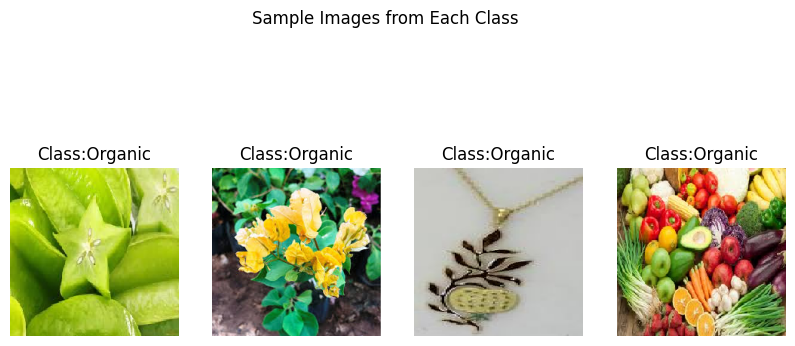

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import kagglehub
import os



base_dir=path
train_dir =os.path.join(base_dir,"DATASET/TRAIN")
test_dir=os.path.join(base_dir,"DATASET/TEST")

train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

plt.figure(figsize=(10,5))
for i in range(4):
  image,label = next(train_data)
  plt.subplot(1,4,i+1)
  plt.imshow(image[0])
  plt.title("Class:"+("Organic" if label[0]==0 else "Recyclable"))
  plt.axis('off')
plt.suptitle("Sample Images from Each Class")
plt.show()

In [ ]:
mobilenet_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),include_top=False,weights='imagenet')
mobilenet_model.tarinable= False

model= tf.keras.Sequential([
    mobilenet_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [17]:
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=2
)
model.save('mobilenet_waste_classifier.h5')
loss,accuracy=model.evaluate(test_data)
print("Model Accuracy:",accuracy)

Epoch 1/2
706/706 ━━━━━━━━━━━━━━━━━━━━ 78s 111ms/step - accuracy: 0.9322 - loss: 0.1746 - val_accuracy: 0.5185 - val_loss: 3.5497
Epoch 2/2
706/706 ━━━━━━━━━━━━━━━━━━━━ 77s 110ms/step - accuracy: 0.9438 - loss: 0.1530 - val_accuracy: 0.6554 - val_loss: 1.5192


79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.6630 - loss: 1.5094
Model Accuracy: 0.6553919911384583


79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step
Classification Report:
               precision    recall  f1-score   support

      Oragic       0.56      0.51      0.53      1401
  Recyclabel       0.45      0.50      0.47      1112

    accuracy                           0.51      2513
   macro avg       0.51      0.51      0.50      2513
weighted avg       0.51      0.51      0.51      2513

Confusion Matrix:
 [[712 689]
 [553 559]]


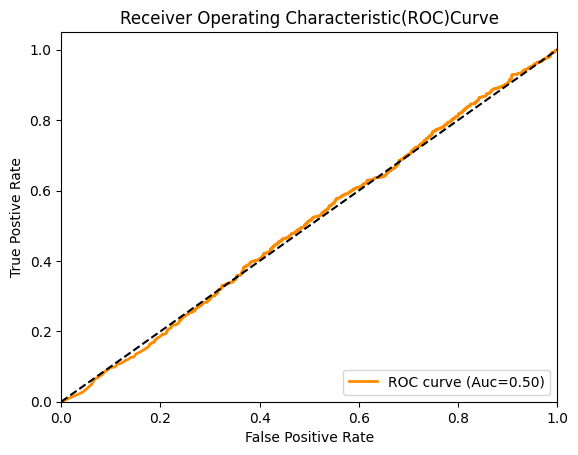

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve, auc
y_pred_prob=model.predict(test_data).flatten()
y_pred = (y_pred_prob>0.5).astype(int)
y_true = test_data.classes
print("Classification Report:\n",classification_report(y_true,y_pred,target_names=['Oragic','Recyclabel']))
conf_matrix=confusion_matrix(y_true,y_pred)
print("Confusion Matrix:\n",conf_matrix)

fpr,trp,_=roc_curve(y_true,y_pred_prob)
roc_auc=auc(fpr,trp)

plt.figure()
plt.plot(fpr,trp,color='darkorange',lw=2,label=f'ROC curve (Auc={roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Postive Rate')
plt.title('Receiver Operating Characteristic(ROC)Curve')
plt.legend(loc="lower right")
plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


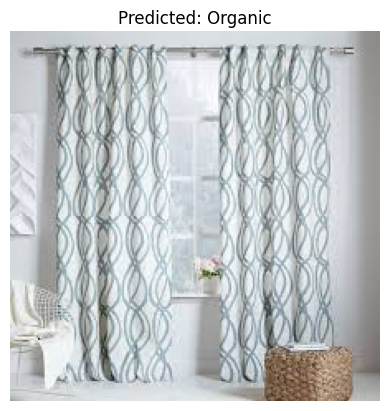

In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import  load_img,img_to_array

model_path ='/content/mobilenet_waste_classifier.h5'
test_image_path="/content/R_10023.jpg"

model=tf.keras.models.load_model(model_path)

test_img=load_img(test_image_path,target_size=(224,224))
test_img_array=img_to_array(test_img)/255.0
test_img_array=np.expand_dims(test_img_array,axis=0)

predicted_prob = model.predict(test_img_array)[0][0]
predicted_class = 'Organic' if predicted_prob > 0.5 else 'Non Oragnic'

plt.imshow(test_img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()

